len(position): 121499
len(speed): 121499
len(states): 121499
position NaNs: 545002 / 3158974 (0.1725)
speed NaNs: 5449 / 121499 (0.0448)
states NaNs: 0 / 121499 (0.0000)
max speed: 2629.0535


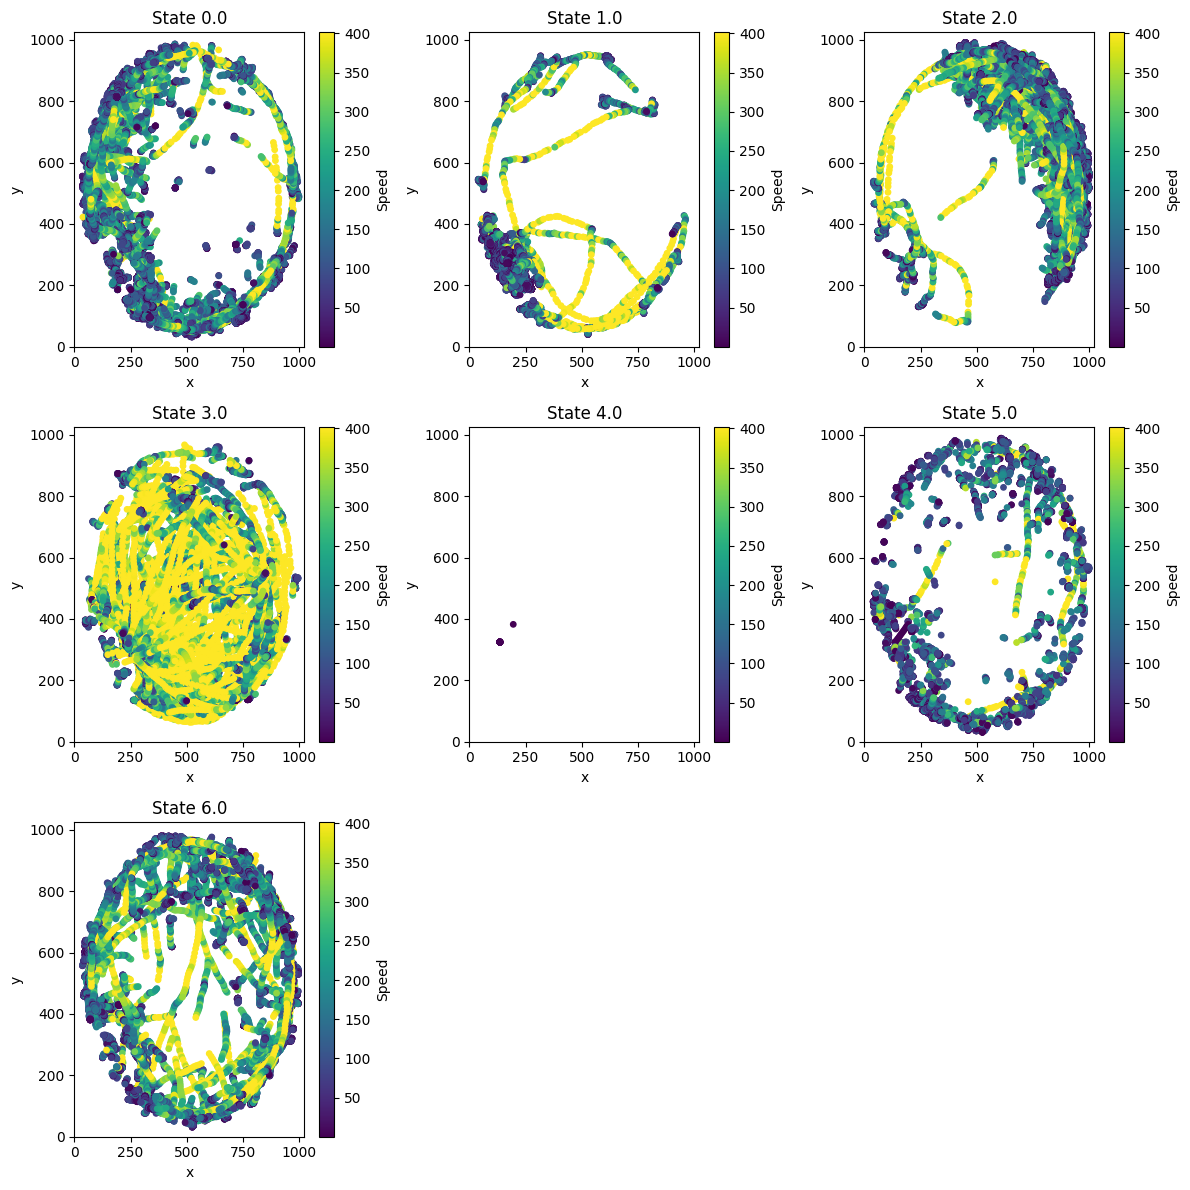

In [28]:
import xarray as xr
from movement.plots import plot_centroid_trajectory, plot_centroid_trajectory_by_states
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


path = r"O:\slenzi\raphe\behaviour_model\other\hmm_data\all_mice\block0_N=8_pairwise_speed_accel_disbod_disrim_HD_objHD\K=7\tracking_data_with_states_block0_N=8_pairwise_speed_accel_disbod_disrim_HD_objHD.nc"
tracking_data_xr = xr.open_dataset(path)

# Suppose the variable storing the centroid is called 'centroid'
position = tracking_data_xr["position"]  # select DataArray
speed = tracking_data_xr["speed"]  # select DataArray
states = tracking_data_xr.states.values

print('len(position):', len(position))
print('len(speed):', len(speed))
print('len(states):', len(states))

# Count NaNs and give ratio for position
position_nans = position.isnull().sum().item()
position_total = position.size
print(f"position NaNs: {position_nans} / {position_total} ({position_nans/position_total:.4f})")

# Count NaNs and give ratio for speed
speed_nans = speed.isnull().sum().item()
speed_total = speed.size
print(f"speed NaNs: {speed_nans} / {speed_total} ({speed_nans/speed_total:.4f})")

# Count NaNs and give ratio for states
states_nans = np.isnan(states).sum()
states_total = states.size
print(f"states NaNs: {states_nans} / {states_total} ({states_nans/states_total:.4f})")
plot_centroid_trajectory(position, c=states)
#save this plot 
path = Path(path)
plot_output_path = path.parent / "state_centroid_trajectory.png"
plt.savefig(plot_output_path, dpi=300, bbox_inches='tight')
plt.close()

plot_centroid_trajectory_by_states(position, c=states, speed=speed)
#save this plot
plot_output_path = path.parent / "state_centroid_trajectory_by_states.png"
plt.savefig(plot_output_path, dpi=300, bbox_inches='tight')


In [17]:
import os

def rename_headdir(root_folder, dry_run=False):
    """
    Recursively renames folders and files inside root_folder:
    - 'objheaddir' -> 'objHD'
    - 'headdir'    -> 'HD'
    
    Skips files that cannot be renamed (e.g., locked in use).
    """

    for current_path, dirs, files in os.walk(root_folder, topdown=False):
        
        # Rename files
        for file in files:
            new_name = file
            if "objheaddir" in new_name:
                new_name = new_name.replace("objheaddir", "objHD")
            if "headdir" in new_name:
                new_name = new_name.replace("headdir", "HD")

            if new_name != file:  
                old_file = os.path.join(current_path, file)
                new_file = os.path.join(current_path, new_name)
                try:
                    if not dry_run:
                        os.rename(old_file, new_file)
                    print(f"Renamed file: {old_file} -> {new_file}")
                except PermissionError:
                    print(f"⚠️ Skipped (in use): {old_file}")

        # Rename directories
        for dir in dirs:
            new_name = dir
            if "objheaddir" in new_name:
                new_name = new_name.replace("objheaddir", "objHD")
            if "headdir" in new_name:
                new_name = new_name.replace("headdir", "HD")

            if new_name != dir:  
                old_dir = os.path.join(current_path, dir)
                new_dir = os.path.join(current_path, new_name)
                try:
                    if not dry_run:
                        os.rename(old_dir, new_dir)
                    print(f"Renamed folder: {old_dir} -> {new_dir}")
                except PermissionError:
                    print(f"⚠️ Skipped (in use): {old_dir}")



# Example usage:
rename_headdir(r"O:\slenzi\raphe\behaviour_model\other\hmm_data\sub-006_id-1123131_type-wtshelterswitch")
